<a href="https://colab.research.google.com/github/Rafidakhanam/Sentiment-Based-Product-Recommendation-System/blob/main/Sentiment_Based_Product_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Attribute Description**


Attribute		Attribute Description

id	                :	Uniques identity number to identify each unique review given by the user to a particular product in the dataset

brand	              :	Name of the brand of the product to which user has given review and rating

categories	        :	Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more.

manufacturer	      :	Name of the manufacturer of the product

name	              :	Name of the product to which user has added review or rating

reviews_date	      :	Date on which the review has been added by the user

reviews_didPurchase	:	Whether a particular user has purchased the product or not

reviews_doRecommend	:	Whether a particular user has recommended the product or not

reviews_rating	    :	Rating given by the user to a particular product

reviews_text	      :	Review given by the user to a particular product

reviews_title	      :	The title of the review given by the user to a particular product

reviews_userCity	  :	The residing city of the user

reviews_userProvince	:	The residing province of the user

reviews_username	  :	The unique identification for individual user in the dataset

user_sentiment	    :	The overall sentiment of the user for a particular product (Positive or Negative)

Problem Statement
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.



Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.



With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.



As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.



In order to do this, we planned to build a sentiment-based product recommendation system, which includes the following tasks.

1. Data sourcing and sentiment analysis
2. Building a recommendation system
3. Improving the recommendations using the sentiment analysis model
4. Deploying the end-to-end project with a user interface

# Data Sourcing and Sentiment analysis

## 1. Data Overview and Preprocessing

# 1.1. Load & Inspect the Data







In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting max rows and columns
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)

In [3]:
# Read the dataset
url = "https://raw.githubusercontent.com/Rafidakhanam/Sentiment-Based-Product-Recommendation-System/main/sample30.csv"

df = pd.read_csv(url)

# Check the dataset, first 5 rows
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [4]:
# checking the data structure

df.shape

(30000, 15)

We have 30000 rows and 15 columns in our dataset

In [5]:
# Check the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
# checking the statistics of dataframe

df.describe()

,reviews_rating
count,30000.00
mean,4.48
std,0.99
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


### Handling Missing Values

In [7]:
# Check missing values

df.isnull().sum()

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,46
reviews_didPurchase,14068
reviews_doRecommend,2570
reviews_rating,0
reviews_text,0


In [8]:
# Check Duplicate Values

df.duplicated().sum()

0

In [9]:
# Display settings to show numbers instead of scientific notations

pd.options.display.float_format = '{:.2f}'.format

In [10]:
# Check percentage of missing values

(df.isnull().sum()/ len(df) * 100).sort_values(ascending=False)

,0
reviews_userProvince,99.43
reviews_userCity,93.57
reviews_didPurchase,46.89
reviews_doRecommend,8.57
reviews_title,0.63
manufacturer,0.47
reviews_username,0.21
reviews_date,0.15
user_sentiment,0.00
id,0.00


Inference:

- reviews_userProvince(99.43% missing): Since nearly all values are missing, this column is likely not useful and can be dropped.

- reviews_userCity (93.57% missing): Similar to the province column, this has too many missing values and may not contribute to our analysis. Dropping it is a reasonable option.

- reviews_didPurchase (46.89% missing): Almost half the data is missing. Also, this column might not provide any strong insights for our analysis. Hence, we can drop.

In [11]:
# Dropping the columns "reviews_userProvince", "reviews_userCity", "reviews_didPurchase"

df.drop(["reviews_userProvince", "reviews_userCity", "reviews_didPurchase"], axis=1, inplace=True)
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         29859 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_doRecommend  27430 non-null  object
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_title        29810 non-null  object
 10  reviews_username     29937 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.7+ MB


Lets look at other missing values

In [13]:
# Checking the rest of the columns with missing values

(df.isnull().sum()/ len(df) * 100).sort_values(ascending=False)

,0
reviews_doRecommend,8.57
reviews_title,0.63
manufacturer,0.47
reviews_username,0.21
reviews_date,0.15
user_sentiment,0.00
id,0.00
brand,0.00
categories,0.00
name,0.00


In [14]:
# Checking reviews_doRecommend column

df["reviews_doRecommend"].value_counts(normalize=True)

,proportion
reviews_doRecommend,
True,0.94
False,0.06


<Axes: ylabel='reviews_doRecommend'>

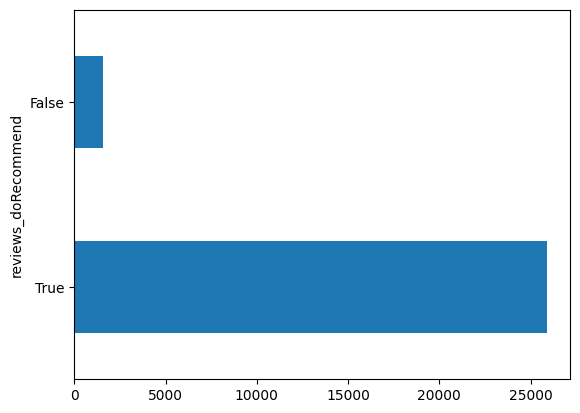

In [15]:
# Checking reviews_doRecommend column plot

df["reviews_doRecommend"].value_counts().plot.barh()

Inference:

- reviews_doRecommend is highly skewed towards True (94%) and False are (0.06%) which means users have recommended most of the products. It might not provide any major insights but it could influence sentiment analysis & recommendations. Hence, deciding to keep the column for now. Let's impute the data with the majority class.

In [16]:
# Impute the "reviews_doRecommend" with "True"

df.reviews_doRecommend.fillna(True, inplace=True)

In [17]:
# Checking reviews_doRecommend column

df["reviews_doRecommend"].value_counts(normalize=True)

,proportion
reviews_doRecommend,
True,0.95
False,0.05


In [18]:
# Checking the rest of the columns with missing values

(df.isnull().sum()/ len(df) * 100).sort_values(ascending=False)

,0
reviews_title,0.63
manufacturer,0.47
reviews_username,0.21
reviews_date,0.15
user_sentiment,0.00
id,0.00
brand,0.00
categories,0.00
name,0.00
reviews_doRecommend,0.00


In [19]:
# Checking reviews_title column

df["reviews_title"].value_counts()

,count
reviews_title,
Great Product,384
Great movie,361
Clorox Wipes,278
Great,221
Great product,205
...,...
Keeping them healthy!,1
Fighting Power,1
great all together,1


In [20]:
# checking the missing review title data

df[df["reviews_title"].isnull()].head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
1239,AV1YneDPglJLPUi8IJyQ,Finish,"Household Essentials,Cleaning Supplies,Dish Detergents,Ways To Shop,Household Essentials Subscriptions,Kitchen,Dishwasher Detergent,Natural Cleaning,Glass Cleaners,Dish Detergent",Reckitt Benckiser,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",2017-11-16T08:12:30.000Z,True,5,Great quality and a great price,NaN,queen 79,Positive
1441,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Shampoo & Conditioner,Salon Hair Care,Conditioners",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",2013-11-07T00:00:00Z,True,3,Wanted to love this but it's a bit too heavy for me. I have mild psoriasis and this seemed to make it itch more?? think it's the argan oil - must be allergic.,NaN,julie,Positive
1442,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Shampoo & Conditioner,Salon Hair Care,Conditioners",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",2015-02-09T00:00:00Z,True,3,I have thick coarse hair and for me this just worked ok. It did not smooth as much as other products I have tried. It has a scent that is acceptable.,NaN,lisa,Negative
1443,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Shampoo & Conditioner,Salon Hair Care,Conditioners",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",2013-11-07T00:00:00Z,True,3,Wanted to love this but it's a bit too heavy for me. I have mild psoriasis and this seemed to make it itch moreI think it's the argan oil - must be allergic.,NaN,julie,Positive
1444,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Shampoo & Conditioner,Salon Hair Care,Conditioners",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",2017-11-27T18:18:38.000Z,True,4,"I actually really enjoy this conditioner. Have tried a whole bunch, both expensive and cheap. I have thick, curly and dry hair so I'm pretty particular about what I use. Smell is nice! I used it with the Moisturizing unscented shampoo and feel like the combo of the two is keeping my hair very he...",NaN,aland,Positive


In [21]:
# Imputing the missing title with "no titles"

df["reviews_title"].fillna("No Title", inplace=True)

Inference:

Decided to impute the missing values with No title as these reviews might be useful for our analysis.

In [22]:
# Checking the rest of the columns with missing values

(df.isnull().sum()/ len(df) * 100).sort_values(ascending=False)

,0
manufacturer,0.47
reviews_username,0.21
reviews_date,0.15
user_sentiment,0.00
id,0.00
brand,0.00
categories,0.00
name,0.00
reviews_doRecommend,0.00
reviews_rating,0.00


In [23]:
# Manufacturer has a minimal impact on dataset. Let's just impute it with Unknown

df["manufacturer"].fillna("Unknown", inplace=True)

In [24]:
# Checking reviews username column

df["reviews_username"].value_counts()

,count
reviews_username,
mike,41
byamazon customer,41
chris,32
lisa,16
sandy,15
...,...
nurse32,1
lisa62,1
bigal515,1


This column is an important column for our analysis since it as unique identification of users. As the missing values are negligible, lets drop the missing values from the dataset.

In [25]:
# dropping the missing values rows from reviews_username column

df = df[~(df["reviews_username"].isna())]

In [26]:
# Lets check the structure of the dataframe

df.shape

(29937, 12)

In [27]:
# Checking the rest of the columns with missing values

(df.isnull().sum()/ len(df) * 100).sort_values(ascending=False)

,0
reviews_date,0.13
user_sentiment,0.00
id,0.00
brand,0.00
categories,0.00
manufacturer,0.00
name,0.00
reviews_doRecommend,0.00
reviews_rating,0.00
reviews_text,0.00


reviews_date is not an important column, we can ignore the missing values.

In [28]:
# Checking the user_sentiment missing value

df[df["user_sentiment"].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2014-11-07T00:00:00.000Z,True,5,my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the poin...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [29]:
# Since it only has one missing value, lets impute that with the mode

df.user_sentiment.fillna(df.user_sentiment.mode()[0], inplace=True)

After handling all the null and missing values we have 12 columns and 29937 rows/reviews.

## 2. Exploratory Data Analysis(EDA)

It is crucial because it helps us understand the dataset, detect patterns, identify missing values, handle outliers and decide how to preprocess the data before applying any models. Steps usually involves:

- Analyzing Categorical columns:
Helps us understand product diversity (brands, categories, manufacturers). Identifies imbalanced data, also helps in feature selection

- Analyzing Numerical Columns:
Understand data spread, central tendencies, and possible scaling needs

- Checking Feature Relationships:
Check correlations and dependencies between variables

- Detecting outliers: Identify extreme values using boxplots or statistical methods.

In our case, we have categorical columns mostly. Let's start with the categorical column analysis!


### Analyzing Categorical Columns

In [30]:
# check all the columns

df.columns


Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [31]:
# check the categorical columns

df.select_dtypes(include="object").columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [32]:
# Selecting categorical columns for EDA

categorical_columns = ["brand", "categories", "manufacturer", "name","user_sentiment","reviews_rating"]

In [33]:
# 1. check unique values per column

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].nunique()} unique values")

Unique values in brand: 214 unique values
Unique values in categories: 270 unique values
Unique values in manufacturer: 228 unique values
Unique values in name: 271 unique values
Unique values in user_sentiment: 2 unique values
Unique values in reviews_rating: 5 unique values


Since *Brand*, *manufacturer*, *Categories*, and *Name* have a large number of unique values, looking at their full distribution wouldn't be very useful. Instead focusing on top 50 most frequent values will help us see the dominant products and categories.

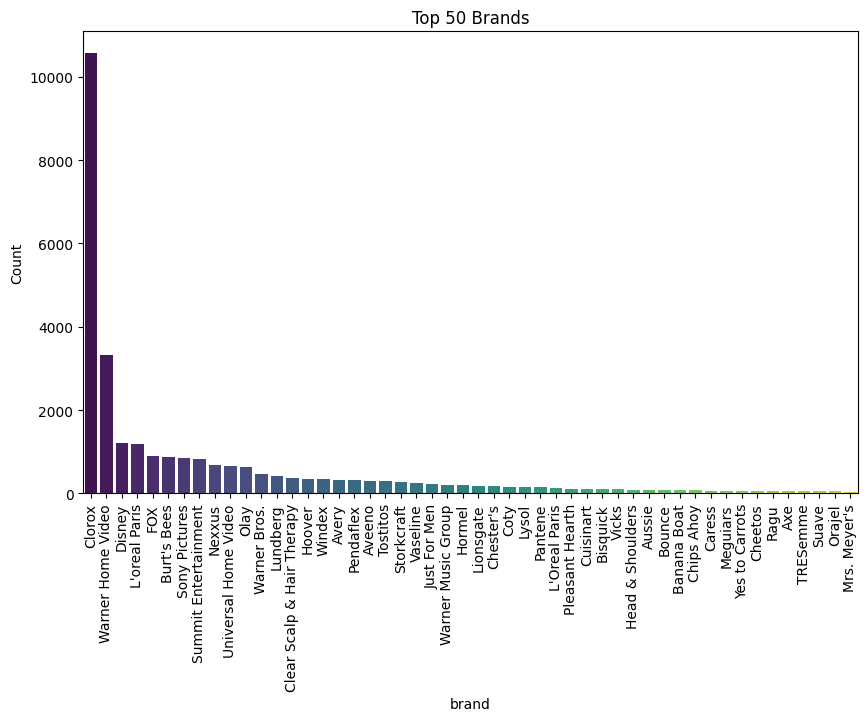

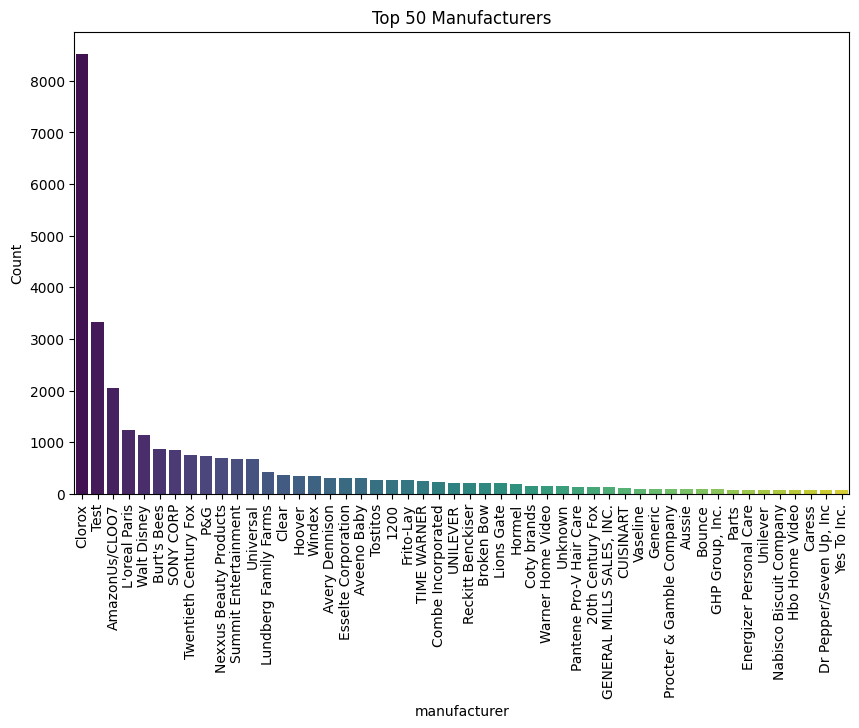

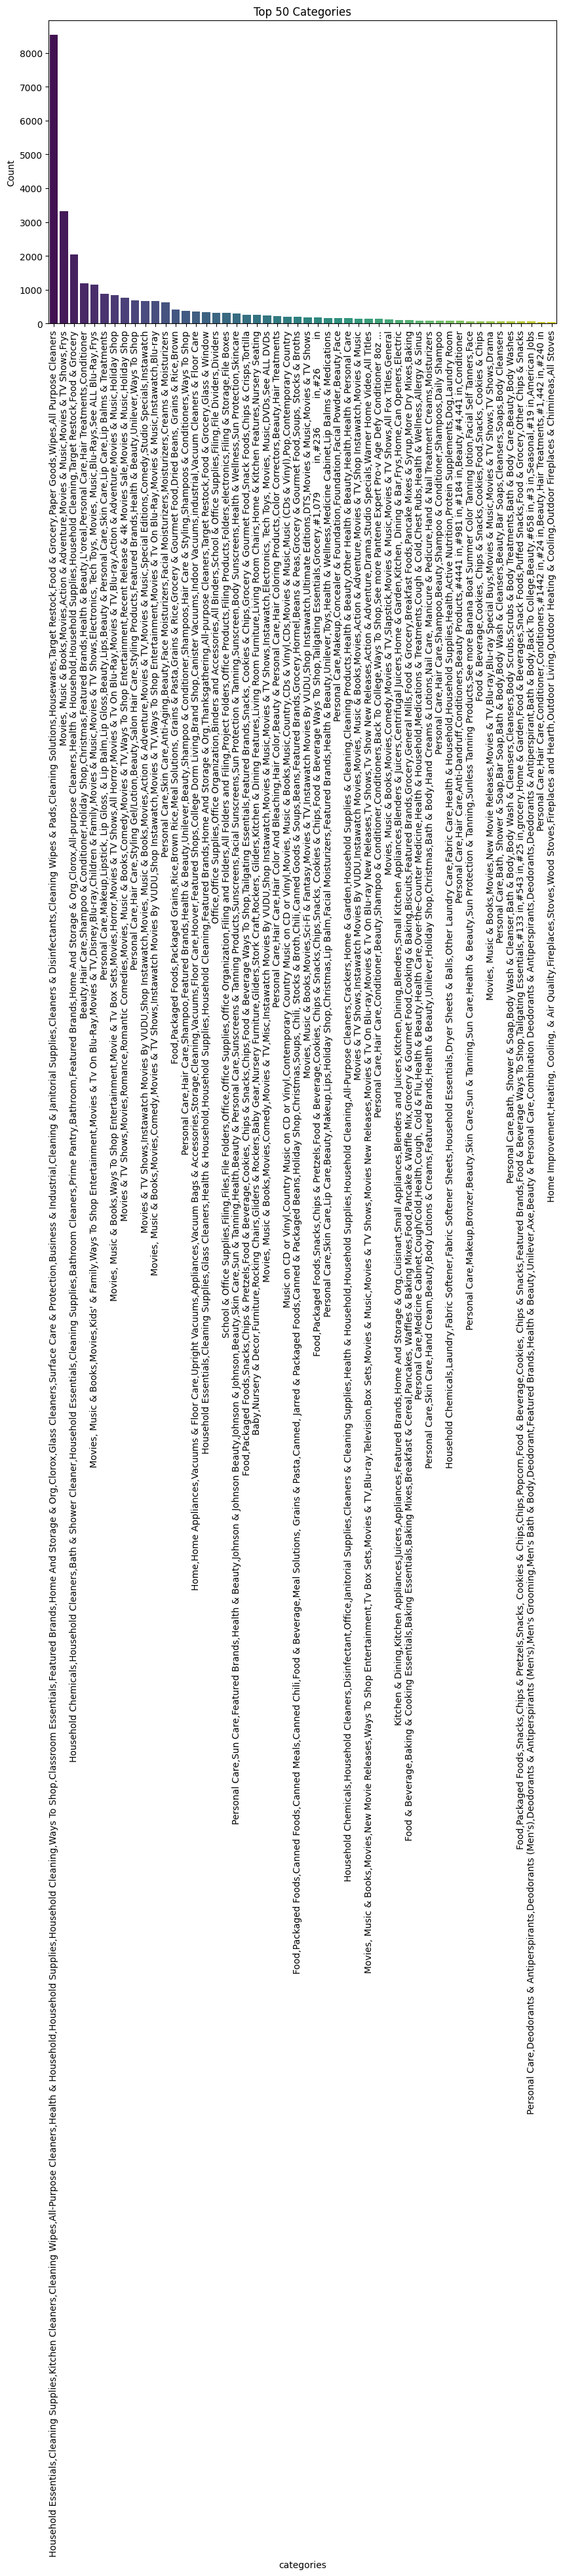

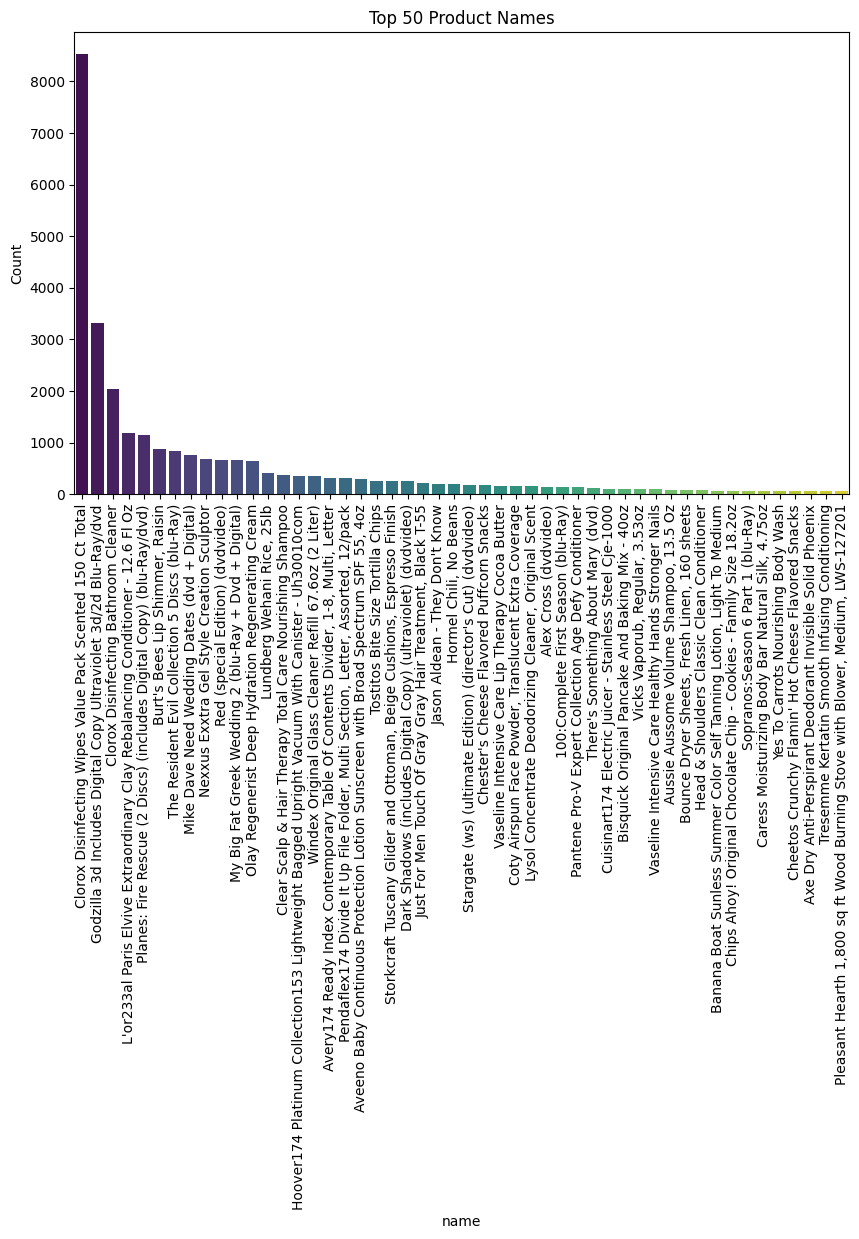

In [34]:
# 2. Function to plot top 50 values of categorical columns

def plot_top_values(column, title):
  top_50 = df[column].value_counts().nlargest(50)
  plt.figure(figsize=(10,6))
  sns.barplot(x=top_50.index, y=top_50.values, palette="viridis")
  plt.title(f"Top 50 {title}")
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.xticks(rotation=90)
  plt.show()

# Plot for each major categorical columns
plot_top_values("brand", "Brands")
plot_top_values("manufacturer", "Manufacturers")
plot_top_values("categories", "Categories")
plot_top_values("name", "Product Names")

Inferences:

The dataset that frequenctly purchased products primarily belong to *Home Care*, *personal care* and *Entertainment* categories. Brands like *Clorox*, *Warner Home Video*, *Disney*, and *Loreal Paris* dominate, with manufacturers such as *Clorox*, *Amazon US* and *Walt Disney* reinforcing this trend. The most common products include *disinfecting wipes*, *Beauty/Personal/Health Care items*, and *Popular movies*, indicating strong consumer interest in household essentials, personal grooming, and entertainment.

<Axes: ylabel='reviews_doRecommend'>

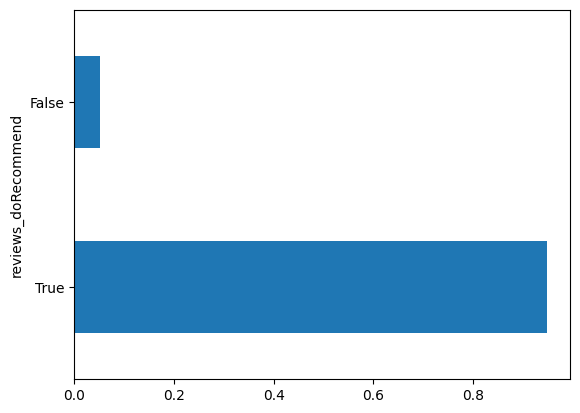

In [35]:
# Distribution of reviews_doRecommend column

df["reviews_doRecommend"].value_counts(normalize=True).plot.barh()

In [36]:
# Comparing reviews_doRecomment with user_sentiment

recommend_sentiment_ct = pd.crosstab(df["reviews_doRecommend"], df["user_sentiment"])
print(recommend_sentiment_ct)

user_sentiment       Negative  Positive
reviews_doRecommend                    
False                     556       994
True                     2801     25586


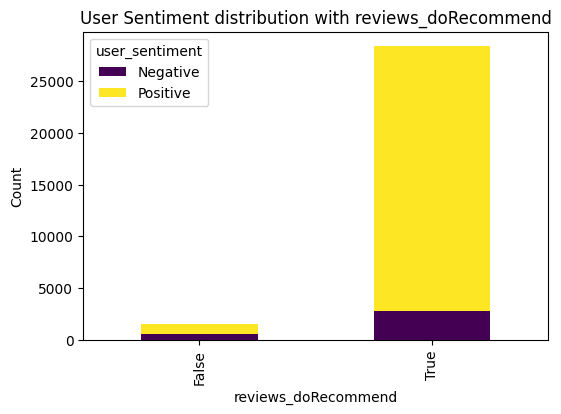

In [37]:
# Visualizing the relationship

recommend_sentiment_ct.plot(kind="bar", stacked=True, colormap="viridis", figsize=(6,4))
plt.title("User Sentiment distribution with reviews_doRecommend")
plt.xlabel("reviews_doRecommend")
plt.ylabel("Count")
plt.legend(title="user_sentiment")
plt.show()

Observations & Insights:

- The majority of reviews are Positive and marked as "Do Recommend"
- A significant portion of negtive sentiment reviews is also marked as "Do Recommend", making the column unreliale for insights.
- User sentiment already captures recommendation intent, making this column redundant for our model.

Hence, we will drop this column as it does not add unique value to our sentiment-based product recommendation system.

In [38]:
# Dropping reviews_doRecommend column

df.drop("reviews_doRecommend", axis=1, inplace=True)
df.shape

(29937, 11)

In [39]:
# Analyzing the column review_rating

df.reviews_rating.value_counts(normalize=True)

,proportion
reviews_rating,
5,0.69
4,0.20
1,0.05
3,0.04
2,0.01


<Axes: xlabel='reviews_rating'>

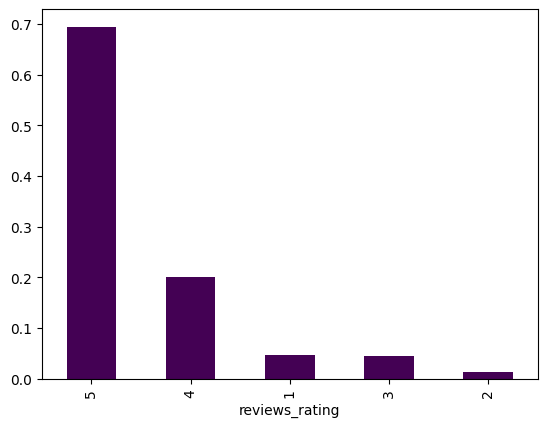

In [40]:
# Let's see the distribution of review_ratings

df["reviews_rating"].value_counts(normalize=True).plot(kind="bar", colormap="viridis")

Observations:

Highly Skewed Towards Positive Ratings:
  - 70% of reviews have a rating of 5
  - 20% have a rating of 4
  - Less than 10% of reviews are distributed among ratings 1,2,and 3

Very few Negative Ratings:
  - Ratings 1,2, and 3 make up a small percentage, indicating fewer dissatisfied users.

Highly positive bias in the dataset could affect the recommendation model's ability to differentiate between products effectively. We may need to explore text-based reviews for additional insights, as ratings alone don't give depth to user opinion.


In [41]:
# Lets analyse the user sentiment column

df.user_sentiment.value_counts(normalize=True)

,proportion
user_sentiment,
Positive,0.89
Negative,0.11


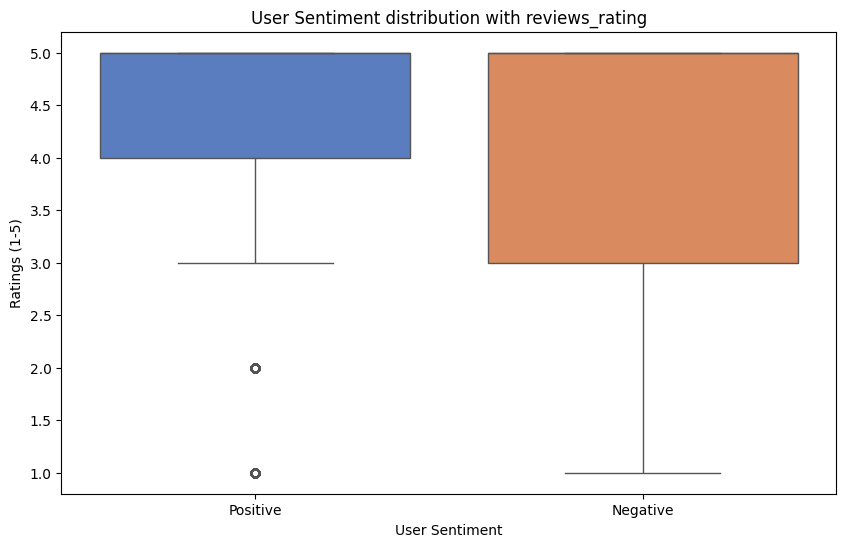

In [42]:
# Checking how ratings correlate with user sentiment

plt.figure(figsize=(10,6))
sns.boxplot(x=df["user_sentiment"], y=df["reviews_rating"], palette="muted")
plt.title("User Sentiment distribution with reviews_rating")
plt.xlabel("User Sentiment")
plt.ylabel("Ratings (1-5)")
plt.show()

Observations from Ratings vs User Sentiment:

- Higher ratings (4&5) are always associated with positive sentiment
- Lower ratings (1 & 2) mostly align with negative sentiment, but some outliers exist where users gave low low ratings but had positive sentiment
- Negative sentiment is not strictly tied to low ratings - some users gave a rating of 3, 4, or even 5 but still had negative sentiment.

Insights:

- Sentiment labels and ratings are mostly aligned, but there are inconsistencies, especially in negative sentiment.

- some users may have expressed dissatisfaction in the text reviews despite giving a higher rating.

- Relying solely on ratings for recommendation may not be enough- text-based sentiment analysis is necessary to capture user intent properly.

In [43]:
# Let's check few reviews which has Positive sentiment but low rating and vice versa

df[(df["user_sentiment"] == "Positive") & (df["reviews_rating"] == 2)]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
64,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-12-02T00:00:00.000Z,2,"While this product probably does leave faces feeling nourished, I would not recommend using it as a daily moisturizer under makeup. It left my face full of crumbles as soon as I brushed on my makeup. Would probably be better as a night cream.",Not a good base for makeup!,jharris20,Positive
66,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-10-23T00:00:00.000Z,2,GreatGreatmefeels great smells great succulent took away dry skin silky smooth enriching,Nice,kikkle,Positive
738,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2012-05-18T04:06:51.000Z,2,This is a great windex product that I came across after a long time.Please try once and then believe me.,Great One,suri,Positive
741,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2014-09-08T00:00:00.000Z,2,"I love Windex!!! Everyone who knows me knows this! However, you guys have messed up perfection. Stop messing up what is already good. Stop trying to cut cost...",I Agree,terrep,Positive
742,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2012-05-18T00:00:00.000Z,2,This is a great windex product that I came across after a long time.Please try once and then believe me.,great one,suri,Positive
...,...,...,...,...,...,...,...,...,...,...,...
28869,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-30T19:52:26.000Z,2,"This was the last step out of the three step process. I will say that this was my least favorite step. The product is designed to take the oil away from your roots and bring moisture to your ends. However, I feel that this brought oil to all of my hair which is why I was left oily later in the d...",Last Step!,mmrowell,Positive
28870,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-28T03:48:36.000Z,2,"I have been a big LOral fan, using their products for more than a decade now. For the past three weeks I have been testing the LOral Paris Hair Expert Extraordinary Clay range - the mask, shampoo and conditioner. I have curly hair with a normal scalp. I have been testing all three products durin...","Unfortunately, Not For My Hair",rally16,Positive
28871,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Tre

In [44]:
df[(df["user_sentiment"] == "Negative") & (df["reviews_rating"] == 4)]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
92,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-05-26T00:00:00.000Z,4,It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.,hydrating but not too heavy,janicec,Negative
96,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-05-26T00:00:00.000Z,4,In only a week I can see the difference in my skin on my face. This review was collected as part of a promotion.,This product has made a real difference on my skin,deedeedeedeesqr,Negative
100,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-05-26T00:00:00.000Z,4,This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.,Noticed a difference in just two weeks!,ellie3,Negative
106,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-06-02T00:00:00.000Z,4,"I like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face This review was collected as part of a promotion.",Very rich cream,kaycoop,Negative
117,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-06-06T00:00:00.000Z,4,"I finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. I apply it, and it feels like there is nothing there but my skin looks smoother. This review was collected as part of a promotion.",Not greasy,rosaliem2001,Negative
...,...,...,...,...,...,...,...,...,...,...,...
29579,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-25T00:00:01.000Z,4,"I received these free to test. Overall, these products do what they promise. The only bad thing about it is the conditioner is hard to rinse out of thick hair. This review was collected as part of a promotion.",Some Good Some Bad,savvyg,Negative
29594,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-22T19:12:48.000Z,4,"I love how soft this conditioner makes my hair feel! Although, it smells horrible. I also don't like that even though the cap is on the opposite side of the shampoo bottle, they look exactly the same otherwise, so it's very tedious to look at them while showering. This review was collected as pa...","Great Product, Horrible Smell",jpalms,Negative
29612,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-21T00:47:00.000Z,4,"This conditioner isn't heavy and not light, a good in between. It also does not make 

Observations:

- Some reviews have negative wording but are still marked as positive sentiment in the dataset.
- Example: A user says a product is *not suitable for them*, yet it is labeled as positive.
- This suggests potential misclassification in the dataset's sentiment labels.

## 3. Feature Selection

Before we move onto Text processing & sentiment reclassification, we will only select relevant columns requrired for building a sentiment model.

For sentiment classification model, we only require review_ratings, review_text, user_sentiment and drop the rest of the columns (ID, Brand, Categories, manufacturer, name, review_date, reviews_username, review_title)

In [45]:
# Creating a new dataframe with only selected columns

df1 = df[["reviews_rating", "reviews_text", "user_sentiment"]]
df1.head()

,reviews_rating,reviews_text,user_sentiment
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive
1,5,Good flavor. This review was collected as part of a promotion.,Positive
2,5,Good flavor.,Positive
3,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Negative
4,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


## 3. Text Processing & Sentiment Reclassification

- We will clean and preprocess the text (remove noise, stopwords, lemmatization)
- We will recalculate sentiment scores using VADERT/TextBlob/BERT to check if existing sentiment labels are reliable.
- If needed, we will use our corrected sentiment labels for model training instead of the dataset's provided ones.

This will ensure that our sentiment-based recommendation system is accurate and reliable.

### Text Preprocessing

We'll clean the review text to ensure better results in sentiment analysis. This includes:

- Lowercasing: Standardizing text
- Removing Punctuation & Special Characters: Avoiding noise
- Removing Stopwords: Words like "the, and, is" don't contribute to meaning
- Lemmatization: Converting words to their base form.


In [46]:
# Let's check if we have any nulls in reviews_text column

df1["reviews_text"].isnull().sum()

0

In [47]:
!pip install swifter

In [48]:
import spacy
import swifter

# Load spaCy's English model (this includes tokenization, lemmatization, and stopwords)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Function to clean text using spacy
def clean_text(text):
  if isinstance(text, str):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
  return ""

# Apply the function using swifter (parallel processing)
df1["cleaned_reviews"] =df1["reviews_text"].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/29937 [00:00<?, ?it/s]

In [49]:
# Verifying the preprocessed text

df1["cleaned_reviews"].head(10).tolist()

['love album good hip hop current pop sound HYPE listen everyday gym rate way metaphor crazy',
 'good flavor review collect promotion',
 'good flavor',
 'read review look buy couple lubricant ultimately disappoint live review read starter boyfriend notice sort enhanced captivate sensation notice messy consistency reminiscent liquid y vaseline difficult clean pleasant especially lack captivate sensation expect disappointed pay lube will use use normal personal lubricant money mess',
 'husband buy gel gel cause irritation feel like burn skin recommend gel',
 'boyfriend buy spice thing bedroom highly disappointed product buy absolutely love ky think similar affect absolutely buy',
 'buy early today excited check base product description expect like regular KY fan expect leave little disappointed',
 'buy product husband try impressed tingling warming leave sticky KY product past love KY disappointing',
 'husband buy extra fun werevboth extremely disappointed especially price waste money pr

In [50]:
df1.head(10)

,reviews_rating,reviews_text,user_sentiment,cleaned_reviews
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,love album good hip hop current pop sound HYPE listen everyday gym rate way metaphor crazy
1,5,Good flavor. This review was collected as part of a promotion.,Positive,good flavor review collect promotion
2,5,Good flavor.,Positive,good flavor
3,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Negative,read review look buy couple lubricant ultimately disappoint live review read starter boyfriend notice sort enhanced captivate sensation notice messy consistency reminiscent liquid y vaseline difficult clean pleasant especially lack captivate sensation expect disappointed pay lube will use use no...
4,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband buy gel gel cause irritation feel like burn skin recommend gel
5,1,My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.,Negative,boyfriend buy spice thing bedroom highly disappointed product buy absolutely love ky think similar affect absolutely buy
6,1,Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we just expected more and were left a little disappointed.,Negative,buy early today excited check base product description expect like regular KY fan expect leave little disappointed
7,1,I bought this product for my husband and I to try and we were not impressed at all. There was no tingling or warming. It left us both very sticky. I have used KY products in the past (loved KY his and hers) but this one was disappointing.,Negative,buy product husband try impressed tingling warming leave sticky KY product past love KY disappointing
8,1,My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this product. We felt nothing but a sticky mess from it.,Negative,husband buy extra fun werevboth extremely disappointed especially price waste money product feel sticky mess
9,1,Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund,Positive,get surprise husband special lube save money plain KY need lube wish return refund


In [51]:
# Drop reviews_text column

df1.drop("reviews_text", axis=1, inplace=True)

## 4. Feature Extraction

### Apply TF-IDF vectorization

We'll convert the preprocessed text into matrix of numerical values.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize TF-IDF Vectorizer with optimized parameters
tfidf_vectorizer = TfidfVectorizer(max_features=3000, max_df=0.9, min_df=5, dtype=np.float32)

# Fit and transform the processed text
X_tfidf = tfidf_vectorizer.fit_transform(df1["cleaned_reviews"])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Check memory usage
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")
print(f"Memory Usage: {X_tfidf.data.nbytes / 1024**2:.2f} MB")

# Display the first few rows of the TF-IDF DataFrame
#tfidf_df.head()


TF-IDF Matrix Shape: (29937, 3000)
Memory Usage: 1.41 MB


In [53]:
# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()

,aaron,ability,able,absolute,absolutely,absorb,accept,acceptable,access,accessible,...,yr,yrs,yucky,yum,yummy,zac,zero,zilla,zombie,zone
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Prepare Final Features (X) and Target (y)


In [54]:
df1["user_sentiment"].value_counts(normalize=True)

,proportion
user_sentiment,
Positive,0.89
Negative,0.11


Since there's a clear imbalance (89% positive vs 11% negative), we should apply SMOTE (Synthetic Minority Over-Sampling Technique) to balance the dataset by generating synthetic samples for negative sentiments to match the positives.

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29937 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews_rating   29937 non-null  int64 
 1   user_sentiment   29937 non-null  object
 2   cleaned_reviews  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [57]:
from scipy.sparse import hstack, csr_matrix

# Convert rating into a numerical feature
X_rating = csr_matrix(np.array(df1["reviews_rating"]).reshape(-1, 1))


In [58]:
# Combine numerical and text features
X = hstack((X_rating, tfidf_df))

In [59]:
# Target variable; convert to binary
y = df1["user_sentiment"].map({'Positive': 1, 'Negative': 0})

In [64]:
X.shape

(29937, 3001)

In [63]:
y.shape

(29937,)

## Splitting the data into Train and Test sets

In [65]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the splits to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (23949, 3001) (23949,)
Testing se shape: (5988, 3001) (5988,)


## Handling Class imbalance

Handling class imbalance using SMOTE on X_train and y_train

In [66]:
from imblearn.over_sampling import SMOTE

# Initiliaze SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit SMOTE on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [67]:
# Print new class distribution
from collections import Counter

print("Original Class Distribution:", Counter(y_train))
print("SMOTE Class Distribution:", Counter(y_train_smote))


Original Class Distribution: Counter({1: 21263, 0: 2686})
SMOTE Class Distribution: Counter({0: 21263, 1: 21263})


In [68]:
# Check new shapes
print("Training set shape after SMOTE:", X_train_smote.shape, y_train_smote.shape)

Training set shape after SMOTE: (42526, 3001) (42526,)


Now that we have handled the imablance in the data. We will move onto training the model.

## Training the model

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [70]:
# Predict on test data
y_pred_logreg = logreg.predict(X_test)

In [71]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred_logreg)
report = classification_report(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Logistic Regression Accuracy: 0.9040
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.87      0.67       671
           1       0.98      0.91      0.94      5317

    accuracy                           0.90      5988
   macro avg       0.76      0.89      0.81      5988
weighted avg       0.93      0.90      0.91      5988

